# XylE data analysis


In [1]:
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../') # use modules in main directory

import genbank_utils as gu
import consensus_viz_utils as cu

# 1. Visualize the consensus motif
Load file containining promoter predictions from the top 3%

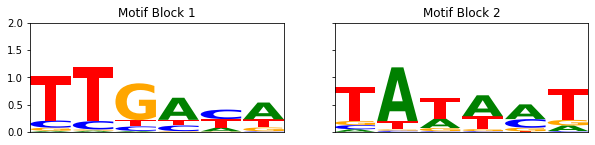

In [2]:
# Load BioPropsector output from predicting promoters from the top 3% of expressed loci
selection_f = "../example_outdir/loci_in_top_3perc_upstream_regions_w300_min20_trunc_W6_w6_G18_g15_d1_a1_n200_1604734841_SELECTION.fa"
motif_blocks, m1, m2 = cu.build_2Bmotif_from_selection_file(selection_f)

In [3]:
motif_blocks[:5]

[('EQU24_RS02895',
  'EQU24_RS02895||exosortase system-associated protein, TIGR04073 family',
  'TTGACAACATTCAACCTTTAGGCTATTGT'),
 ('EQU24_RS02970',
  'EQU24_RS02970|pqqA|pyrroloquinoline quinone precursor peptide PqqA',
  'TTGCTTTGCCTAAATTATCGTCGTATACT'),
 ('EQU24_RS03495',
  'EQU24_RS03495||cold-shock protein',
  'TTGACTTTGGGGAAATAAGGCATAGAAT'),
 ('EQU24_RS07185',
  'EQU24_RS07185||glutamate--ammonia ligase',
  'TTGTAATTGAGATCAATTAGTTGCTTATAT'),
 ('EQU24_RS07390',
  'EQU24_RS07390|rpmI|50S ribosomal protein L35',
  'CTCAAGGAAACTTACTATTTTTAATCG')]

# 2. Score consensus motif PSSM matches to hexamers of predicted promoters
The above motifs were derived from the first 6 and final 6 bases of each predicted promoter from the set of top loci. Here, we simply apply this Position Specific Scoring Matrix (PSSM) back to the inputs to gauge in general, how well does this motif match the inputs. If most inputs receive relatively high scores, it suggests that there was a clearer signal that was found among the promoter input sequences provided and the consensus summarizes the signal well across the top loci promoter predcitions. Lower scores indicate that the consensus didn't summarize the predictions very well (perhaps the signal it found wasn't very clear, there were multiple competing signals, or maybe individual inputs didn't have this particular promoter structure (possibly a different sigma factor structure)). 

In [4]:
hex_score_df = cu.score_predictions_to_motif(motif_blocks, m1, m2)
hex_score_df['spacer'] = hex_score_df['motif_block'].apply(lambda x: len(x) - 12)
hex_score_df.head()

,locus_tag,desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,spacer
0,EQU24_RS02895,EQU24_RS02895||exosortase system-associated pr...,TTGACAACATTCAACCTTTAGGCTATTGT,TTGACA,8.353386,TATTGT,5.705159,14.058544,17
1,EQU24_RS02970,EQU24_RS02970|pqqA|pyrroloquinoline quinone pr...,TTGCTTTGCCTAAATTATCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,17
2,EQU24_RS03495,EQU24_RS03495||cold-shock protein,TTGACTTTGGGGAAATAAGGCATAGAAT,TTGACT,7.306080,TAGAAT,5.739588,13.045668,16
3,EQU24_RS07185,EQU24_RS07185||glutamate--ammonia ligase,TTGTAATTGAGATCAATTAGTTGCTTATAT,TTGTAA,5.040391,TTATAT,3.933783,8.974174,18
4,EQU24_RS07390,EQU24_RS07390|rpmI|50S ribosomal protein L35,CTCAAGGAAACTTACTATTTTTAATCG,CTCAAG,-0.801626,TAATCG,3.369716,2.568090,15


In [5]:
# use consensus to score manual rpoD promoter
rpod_blocks = [("EQU24_RS00520","EQU24_RS00520|rpoD|","TTAACATAAAAAAGAATATGTTGTATAAT")]
rpod_score_df = cu.score_predictions_to_motif(rpod_blocks, m1, m2)

In [6]:
rpod_score_df

,locus_tag,desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score
0,EQU24_RS00520,EQU24_RS00520|rpoD|,TTAACATAAAAAAGAATATGTTGTATAAT,TTAACA,2.995834,TATAAT,8.462053,11.457888


In [7]:
# write out df
#hex_score_df.to_csv('hex_scores.tsv', sep='\t', index=False)

# Load Xyle data

In [8]:
# reload data with xyle info added from experiments
xyle_df = pd.read_csv('hex_scores_xyle.txt',sep='\t')
xyle_df.head()

,locus_tag,desc,manual_desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,spacer,rep1,rep2,rep3,assayed,include?,category
0,EQU24_RS02895,EQU24_RS02895||exosortase system-associated pr...,Exosortase system-associated protein - EQU24_R...,TTGACAACATTCAACCTTTAGGCTATTGT,TTGACA,8.353386,TATTGT,5.705159,14.058544,17.0,2437.8,2571.8,1228.4,1,1,prediction
1,EQU24_RS02970,EQU24_RS02970|pqqA|pyrroloquinoline quinone pr...,PQQ precursor peptide (pqqA) - EQU24_RS02970,TTGCTTTGCCTAAATTATCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,17.0,675.2,789.0,783.2,1,1,scramble
2,EQU24_RS03495,EQU24_RS03495||cold-shock protein,Cold-shock protein - EQU24_RS03495,TTGACTTTGGGGAAATAAGGCATAGAAT,TTGACT,7.306080,TAGAAT,5.739588,13.045668,16.0,213.0,362.6,189.0,1,1,prediction
3,EQU24_RS07185,EQU24_RS07185||glutamate--ammonia ligase,Glutamate-ammonia ligase - EQU24_RS07185,TTGTAATTGAGATCAATTAGTTGCTTATAT,TTGTAA,5.040391,TTATAT,3.933783,8.974175,18.0,-1.0,-1.0,-1.0,1,0,prediction
4,EQU24_RS07390,EQU24_RS07390|rpmI|50S ribosomal protein L35,50S ribosomal protein L35 - EQU24_RS07390,CTCAAGGAAACTTACTATTTTTAATCG,CTCAAG,-0.801626,TAATCG,3.369716,2.568090,15.0,0.0,0.0,0.0,0,0,prediction


In [9]:
# calculate mean and stdev
xyle_df['mean_xyle'] = xyle_df.apply(lambda row: np.mean(row[['rep1','rep2','rep3']]),axis=1)
xyle_df['std_xyle'] = xyle_df.apply(lambda row: np.std(row[['rep1','rep2','rep3']]),axis=1)
xyle_df['std_low'] = xyle_df.apply(lambda row: row['mean_xyle'] - row['std_xyle'],axis=1)
xyle_df['std_high'] = xyle_df.apply(lambda row: row['mean_xyle'] + row['std_xyle'],axis=1)
xyle_df.head()

,locus_tag,desc,manual_desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,spacer,rep1,rep2,rep3,assayed,include?,category,mean_xyle,std_xyle,std_low,std_high
0,EQU24_RS02895,EQU24_RS02895||exosortase system-associated pr...,Exosortase system-associated protein - EQU24_R...,TTGACAACATTCAACCTTTAGGCTATTGT,TTGACA,8.353386,TATTGT,5.705159,14.058544,17.0,2437.8,2571.8,1228.4,1,1,prediction,2079.333333,604.182452,1475.150881,2683.515786
1,EQU24_RS02970,EQU24_RS02970|pqqA|pyrroloquinoline quinone pr...,PQQ precursor peptide (pqqA) - EQU24_RS02970,TTGCTTTGCCTAAATTATCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,17.0,675.2,789.0,783.2,1,1,scramble,749.133333,52.332357,696.800977,801.465690
2,EQU24_RS03495,EQU24_RS03495||cold-shock protein,Cold-shock protein - EQU24_RS03495,TTGACTTTGGGGAAATAAGGCATAGAAT,TTGACT,7.306080,TAGAAT,5.739588,13.045668,16.0,213.0,362.6,189.0,1,1,prediction,254.866667,76.806481,178.060185,331.673148
3,EQU24_RS07185,EQU24_RS07185||glutamate--ammonia ligase,Glutamate-ammonia ligase - EQU24_RS07185,TTGTAATTGAGATCAATTAGTTGCTTATAT,TTGTAA,5.040391,TTATAT,3.933783,8.974175,18.0,-1.0,-1.0,-1.0,1,0,prediction,-1.000000,0.000000,-1.000000,-1.000000
4,EQU24_RS07390,EQU24_RS07390|rpmI|50S ribosomal protein L35,50S ribosomal protein L35 - EQU24_RS07390,CTCAAGGAAACTTACTATTTTTAATCG,CTCAAG,-0.801626,TAATCG,3.369716,2.568090,15.0,0.0,0.0,0.0,0,0,prediction,0.000000,0.000000,0.000000,0.000000


In [10]:
# sort by expression, only include specific rows for the plot
df = xyle_df.sort_values('mean_xyle',ascending=False)
df = df[df['include?'] == 1]
df

,locus_tag,desc,manual_desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,spacer,rep1,rep2,rep3,assayed,include?,category,mean_xyle,std_xyle,std_low,std_high
0,EQU24_RS02895,EQU24_RS02895||exosortase system-associated pr...,Exosortase system-associated protein - EQU24_R...,TTGACAACATTCAACCTTTAGGCTATTGT,TTGACA,8.353386,TATTGT,5.705159,14.058544,17.0,2437.8,2571.8,1228.4,1,1,prediction,2079.333333,604.182452,1475.150881,2683.515786
26,Temp1,Consensus_promoter,"Predicted consensus promoter, random spacer",TTGACAGATTTAGTCGTAACTTGTATAAT,TTGACA,8.353386,TATAAT,8.462053,16.815439,17.0,749.0,689.6,1757.4,1,1,consensus,1065.333333,489.965504,575.367829,1555.298838
7,EQU24_RS12525,EQU24_RS12525|ssrA|transfer-messenger RNA,Transfer-messenger RNA (ssrA) - EQU24_RS12525,TTGCTAATGATGAATTTAATTGTTAATAT,TTGCTA,6.262784,TAATAT,6.618281,12.881065,17.0,987.2,1047.4,834.4,1,1,scramble,956.333333,89.654200,866.679133,1045.987533
1,EQU24_RS02970,EQU24_RS02970|pqqA|pyrroloquinoline quinone pr...,PQQ precursor peptide (pqqA) - EQU24_RS02970,TTGCTTTGCCTAAATTATCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,17.0,675.2,789.0,783.2,1,1,scramble,749.133333,52.332357,696.800977,801.465690
17,EQU24_RS19315,EQU24_RS19315|pmoC|methane monooxygenase/ammon...,Methane monooxygenase subunit C (pmoC) - EQU24...,TTGACAAGCCTTTTCGAAATGATAAACT,TTGACA,8.353386,TAAACT,6.554032,14.907417,16.0,502.6,444.8,926.0,1,1,scramble,624.466667,214.518023,409.948644,838.984690
8,EQU24_RS15100,EQU24_RS15100||HU family DNA-binding protein,HU family DNA-binding protein - EQU24_RS15100,TTGACACTTTATGAGTCGTGTTGATATAAA,TTGACA,8.353386,TATAAA,5.984006,14.337393,18.0,600.4,492.8,507.8,1,1,prediction,533.666667,47.583284,486.083383,581.249950
2,EQU24_RS03495,EQU24_RS03495||cold-shock protein,Cold-shock protein - EQU24_RS03495,TTGACTTTGGGGAAATAAGGCATAGAAT,TTGACT,7.306080,TAGAAT,5.739588,13.045668,16.0,213.0,362.6,189.0,1,1,prediction,254.866667,76.806481,178.060185,331.673148
25,EQU24_RS00520,EQU24_RS00520|rpoD|,"RNA polymerase sigma factor, rpoD - EQU24_RS00520",TTAACATAAAAAAGAATATGTTGTATAAT,TTAACA,2.995834,TATAAT,8.462053,11.457888,17.0,201.6,180.0,189.0,1,1,control,190.200000,8.858894,181.341106,199.058894


In [11]:
# change bar colors (light blue for CD panel)
domain = ['prediction', 'control','scramble', 'consensus']
range_ = ['#464EC1', 'gray', '#2EA0F2','#8108A6']

bar = alt.Chart(
    df[df['locus_tag'] !="Temp2"].sort_values('mean_xyle',ascending=False),
).mark_bar().encode(
    y=alt.Y('manual_desc:N',
            axis=alt.Axis(title=None),
            sort=alt.EncodingSortField(field="mean_xyle", order='descending'),
           ),
    x=alt.X('mean_xyle:Q',axis=alt.Axis(title="XylE Activity")),
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
    color=alt.Color('category:N', scale=alt.Scale(domain=domain,range=range_)),
).properties(
    width=300,
    height=400
)


error_bars = bar.mark_rule().encode(
  x=alt.X('std_low:Q'),
  x2=alt.X2('std_high:Q'),
    y=alt.Y('manual_desc:N',
            axis=alt.Axis(title=None,labels=False),
            sort=alt.EncodingSortField(field="mean_xyle", order='descending'),
           ),
    color=alt.value('black')
)

#alt.layer(bar, error_bars).resolve_scale(y='independent')
chart = bar + error_bars
chart.configure_axis(
    labelFontSize=14,
    labelLimit=600
).resolve_scale(y='independent')

alt.LayerChart(...)

In [12]:
# change bar color (synthetic and reference)
domain = ['prediction', 'control','scramble', 'consensus']
range_ = ['#464EC1', 'gray', '#464EC1','#2EA0F2']

bar = alt.Chart(
    df[df['locus_tag'] !="Temp2"].sort_values('mean_xyle',ascending=False),
).mark_bar().encode(
    y=alt.Y('manual_desc:N',
            axis=alt.Axis(title=None),
            sort=alt.EncodingSortField(field="mean_xyle", order='descending'),
           ),
    x=alt.X('mean_xyle:Q',axis=alt.Axis(title="XylE Activity")),
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
    color=alt.Color('category:N', scale=alt.Scale(domain=domain,range=range_)),
).properties(
    width=300,
    height=200
)


error_bars = bar.mark_rule().encode(
  x=alt.X('std_low:Q'),
  x2=alt.X2('std_high:Q'),
    y=alt.Y('manual_desc:N',
            axis=alt.Axis(title=None,labels=False),
            sort=alt.EncodingSortField(field="mean_xyle", order='descending'),
           ),
    color=alt.value('black')
)

#alt.layer(bar, error_bars).resolve_scale(y='independent')
chart = bar + error_bars
chart.configure_axis(
    labelFontSize=14,
    labelLimit=600
).resolve_scale(y='independent')

alt.LayerChart(...)

# score vs xylE

In [13]:
# scatter plot of hex1 vs hex 2
dfx = xyle_df[xyle_df['assayed'] == 1]
# separate synthetic consensus promoter
synth = xyle_df[xyle_df['locus_tag'] == "Temp1"]
dfx = dfx[dfx['locus_tag'] != "Temp1"]

# plot promoter predictions as circles
scatter = alt.Chart(dfx).mark_point().encode(
    x=alt.X('total_score:Q',axis=alt.Axis(title="Similarity to predicted consensus motif (log odds)")),
    y=alt.Y('mean_xyle:Q',axis=alt.Axis(title="XylE Activity")),
    color=alt.Color('spacer:N',scale=alt.Scale(scheme='dark2'),sort='descending'),
    # sinebow, tableau10, viridis, set2
    size=alt.value(400),
    strokeWidth=alt.value(5),
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
)

# plot synthetic consensus as a diamond
consensus = alt.Chart(synth).mark_point(
    shape='diamond'
).encode(
    x=alt.X('total_score:Q',axis=alt.Axis(title="Similarity to predicted consensus motif (log odds)")),
    y=alt.Y('mean_xyle:Q',axis=alt.Axis(title="XylE Activity")),
    color=alt.Color('spacer:N',scale=alt.Scale(scheme='dark2'),sort='descending'),
    # sinebow, tableau10, viridis, set2
    size=alt.value(400),
    strokeWidth=alt.value(5),
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
)

#combo.save('consensus_scatter.html')
chart = scatter + consensus
    
chart.properties(
    width=400,
    height=400
).configure_axis(
    labelFontSize=14,
    titleFontSize=16,
    grid=False
).configure_view(
    strokeWidth=0
).interactive()

alt.LayerChart(...)

# scramble data

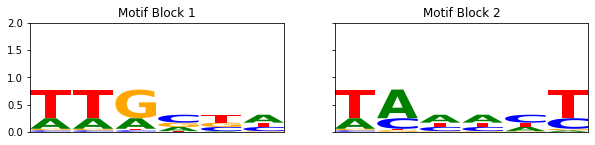

In [14]:
scramble_f = 'scramble_seqs.fa'
motif_blocks_sc, _, _ = cu.build_2Bmotif_from_selection_file(scramble_f)

In [15]:
motif_blocks_sc[0:5]

[('EQU24_RS19315',
  'EQU24_RS19315|pmoC|wildtype',
  'TTGACAAGCCTTTTCGAAATGATAAACT'),
 ('EQU24_RS19315',
  'EQU24_RS19315|pmoC|35_scramble',
  'AAAGGCAGCCTTTTCGAAATGATAAACT'),
 ('EQU24_RS19315',
  'EQU24_RS19315|pmoC|10_scramble',
  'TTGACAAGCCTTTTCGAAATGAACCCTC'),
 ('EQU24_RS19315',
  'EQU24_RS19315|pmoC|spacer_scramble',
  'TTGACAAGCCTAGTAAGAATGATAAACT'),
 ('EQU24_RS02970',
  'EQU24_RS02970|pqqA|wildtype',
  'TTGCTTTGCCTAAATTATCGTCGTATACT')]

In [16]:
# build df of scrambled sequences with hex scores for consensus motif match
scramble_df = cu.score_predictions_to_motif(motif_blocks_sc, m1, m2)
scramble_df['gene'] = scramble_df['desc'].apply(lambda x: x.split("|")[1])
scramble_df['variant'] = scramble_df['desc'].apply(lambda x: x.split("|")[2])
scramble_df['spacer'] = scramble_df['motif_block'].apply(lambda x: len(x) - 12)
scramble_df

,locus_tag,desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,gene,variant,spacer
0,EQU24_RS19315,EQU24_RS19315|pmoC|wildtype,TTGACAAGCCTTTTCGAAATGATAAACT,TTGACA,8.353386,TAAACT,6.554032,14.907417,pmoC,wildtype,16
1,EQU24_RS19315,EQU24_RS19315|pmoC|35_scramble,AAAGGCAGCCTTTTCGAAATGATAAACT,AAAGGC,-22.529325,TAAACT,6.554032,-15.975294,pmoC,35_scramble,16
2,EQU24_RS19315,EQU24_RS19315|pmoC|10_scramble,TTGACAAGCCTTTTCGAAATGAACCCTC,TTGACA,8.353386,ACCCTC,-20.944363,-12.590977,pmoC,10_scramble,16
3,EQU24_RS19315,EQU24_RS19315|pmoC|spacer_scramble,TTGACAAGCCTAGTAAGAATGATAAACT,TTGACA,8.353386,TAAACT,6.554032,14.907417,pmoC,spacer_scramble,16
4,EQU24_RS02970,EQU24_RS02970|pqqA|wildtype,TTGCTTTGCCTAAATTATCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,pqqA,wildtype,17
5,EQU24_RS02970,EQU24_RS02970|pqqA|35_scramble,AAAGGCTGCCTAAATTATCGTCGTATACT,AAAGGC,-22.529325,TATACT,7.691535,-14.837790,pqqA,35_scramble,17
6,EQU24_RS02970,EQU24_RS02970|pqqA|10_scramble,TTGCTTTGCCTAAATTATCGTCGACCCTC,TTGCTT,5.215478,ACCCTC,-20.944363,-15.728885,pqqA,10_scramble,17
7,EQU24_RS02970,EQU24_RS02970|pqqA|spacer_scramble,TTGCTTTGCCTAGTAAGTCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,pqqA,spacer_scramble,17
8,EQU24_RS12525,EQU24_RS12525|ssrA|wildtype,TTGCTAATGATGAATTTAATTGTTAATAT,TTGCTA,6.262784,TAATAT,6.618281,12.881065,ssrA,wildtype,17
9,EQU24_RS12525,EQU24_RS12525|ssrA|35_scramble,AAAGGCATGATGAATTTAATTGTTAATAT,AAAGGC,-22.529325,TAATAT,6.618281,-15.911044,ssrA,35_scramble,17


In [17]:
#scramble_df.to_csv('scramble_df.tsv',sep='\t',index=False)

In [18]:
# load scramble df back with XylE data added
scramble_df_xyle = pd.read_csv('scramble_df_xyle.txt',sep='\t')

In [19]:
scramble_df_xyle['mean_xyle'] = scramble_df_xyle.apply(lambda row: np.mean(row[['rep1','rep2','rep3']]),axis=1)
scramble_df_xyle['std_xyle'] = scramble_df_xyle.apply(lambda row: np.std(row[['rep1','rep2','rep3']]),axis=1)
scramble_df_xyle['std_low'] = scramble_df_xyle.apply(lambda row: row['mean_xyle'] - row['std_xyle'],axis=1)
scramble_df_xyle['std_high'] = scramble_df_xyle.apply(lambda row: row['mean_xyle'] + row['std_xyle'],axis=1)
scramble_df_xyle

,locus_tag,desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,gene,variant,spacer,rep1,rep2,rep3,mean_xyle,std_xyle,std_low,std_high
0,EQU24_RS19315,EQU24_RS19315|pmoC|wildtype,TTGACAAGCCTTTTCGAAATGATAAACT,TTGACA,8.353386,TAAACT,6.554032,14.907417,pmoC,wildtype,16,792.0,883.4,800.0,825.133333,41.330000,783.803333,866.463333
1,EQU24_RS19315,EQU24_RS19315|pmoC|35_scramble,AAAGGCAGCCTTTTCGAAATGATAAACT,AAAGGC,-22.529325,TAAACT,6.554032,-15.975294,pmoC,35_scramble,16,-28.4,-86.0,-95.6,-70.000000,29.675579,-99.675579,-40.324421
2,EQU24_RS19315,EQU24_RS19315|pmoC|10_scramble,TTGACAAGCCTTTTCGAAATGAACCCTC,TTGACA,8.353386,ACCCTC,-20.944363,-12.590977,pmoC,10_scramble,16,-111.0,-232.8,-178.0,-173.933333,49.807719,-223.741053,-124.125614
3,EQU24_RS19315,EQU24_RS19315|pmoC|spacer_scramble,TTGACAAGCCTAGTAAGAATGATAAACT,TTGACA,8.353386,TAAACT,6.554032,14.907417,pmoC,spacer_scramble,16,890.6,781.4,911.0,861.000000,56.898506,804.101494,917.898506
4,EQU24_RS02970,EQU24_RS02970|pqqA|wildtype,TTGCTTTGCCTAAATTATCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,pqqA,wildtype,17,884.8,1214.2,1078.8,1059.266667,135.184450,924.082217,1194.451117
5,EQU24_RS02970,EQU24_RS02970|pqqA|35_scramble,AAAGGCTGCCTAAATTATCGTCGTATACT,AAAGGC,-22.529325,TATACT,7.691535,-14.837790,pqqA,35_scramble,17,-81.0,-116.4,-22.0,-73.133333,38.938013,-112.071347,-34.195320
6,EQU24_RS02970,EQU24_RS02970|pqqA|10_scramble,TTGCTTTGCCTAAATTATCGTCGACCCTC,TTGCTT,5.215478,ACCCTC,-20.944363,-15.728885,pqqA,10_scramble,17,-25.6,-67.6,-39.0,-44.066667,17.516722,-61.583389,-26.549944
7,EQU24_RS02970,EQU24_RS02970|pqqA|spacer_scramble,TTGCTTTGCCTAGTAAGTCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,pqqA,spacer_scramble,17,1329.4,1199.8,834.6,1121.266667,209.495224,911.771443,1330.761891
8,EQU24_RS12525,EQU24_RS12525|ssrA|wildtype,TTGCTAATGATGAATTTAATTGTTAATAT,TTGCTA,6.262784,TAATAT,6.618281,12.881065,ssrA,wildtype,17,442.0,646.8,643.0,577.266667,95.660557,481.606109,672.927224
9,EQU24_RS12525,EQU24_RS12525|ssrA|35_scramble,AAAGGCATGATGAATTTAATTGTTAATAT,AAAGGC,-22.529325,TAATAT,6.618281,-15.911044,ssrA,35_scramble,17,-68.0,-66.0,-49.4,-61.133333,8.336799,-69.470133,-52.796534


In [20]:
def xyle_scramble_plot_v(df):

    domain = ['wildtype', '35_scramble', '10_scramble','spacer_scramble']
    range_ = ['#66C2A5', '#FC8E62', '#E689C2','#A6D953']

    bar = alt.Chart().mark_bar().encode(
        x = alt.X('variant:N', title=None, axis=None, sort=['wildtype', '35_scramble', '10_scramble','spacer_scramble']),
        y = alt.Y('mean_xyle', title='XylE Activity'),
        color = alt.Color('variant:N', sort=['wildtype', '35_scramble', '10_scramble','spacer_scramble'],
                         legend=alt.Legend(title="Scramble Variant"),
                         scale=alt.Scale(domain=domain, range=range_)),
        tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
    ).properties(
        width=150,
        height=200
    )

    error_bars = alt.Chart().mark_rule().encode(
      x = alt.X('variant:N', title=None, axis=None, sort=['wildtype', '35_scramble', '10_scramble','spacer_scramble']),
        y=alt.Y('std_low:Q'),
      y2=alt.Y2('std_high:Q')
    )

    chart = alt.layer(bar, error_bars, data=df).facet(
        column = alt.Column('gene:N', sort=['pmoC', 'pqqA', 'ssrA']),
        #header=alt.Header(labelFontSize=20)
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14,
        grid=False
        #headerFontSize=14
    ).configure_header(
        title=None,
        #titleFontSize=14,
        labelFontSize=14,
        labelOrient='bottom'
    ).configure_legend(
        labelFontSize=14,
        #title='Scramble Variant',
        titleFontSize=16
    ).configure_view(
        strokeOpacity=0
    )
    
    return chart

In [21]:
xyle_scramble_plot_v(scramble_df_xyle)

alt.FacetChart(...)

In [22]:
def xyle_scramble_plot_h(df):

    domain = ['wildtype', '35_scramble', '10_scramble','spacer_scramble']
    range_ = ['#66C2A5', '#FC8E62', '#E689C2','#A6D953']

    bar = alt.Chart().mark_bar().encode(
        y = alt.Y('variant:N', title=None, axis=None, sort=['wildtype', '35_scramble', '10_scramble','spacer_scramble']),
        x = alt.X('mean_xyle', title='XylE Activity'),
        color = alt.Color('variant:N', sort=['wildtype', '35_scramble', '10_scramble','spacer_scramble'],
                         legend=alt.Legend(title="Scramble Variant"),
                         scale=alt.Scale(domain=domain, range=range_)),
        tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
    ).properties(
        width=150,
        height=150
    )

    error_bars = alt.Chart().mark_rule().encode(
        y = alt.Y('variant:N', title=None, axis=None, sort=['wildtype', '35_scramble', '10_scramble','spacer_scramble']),
        x=alt.X('std_low:Q'),
        x2=alt.X2('std_high:Q')
    )

    chart = alt.layer(bar, error_bars, data=df).facet(
        column = alt.Column('gene:N', sort=['pmoC', 'pqqA', 'ssrA']),
        #header=alt.Header(labelFontSize=20)
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14,
        grid=True
        #headerFontSize=14
    ).configure_header(
        title=None,
        #titleFontSize=14,
        labelFontSize=20,
        labelOrient='top'
    ).configure_legend(
        labelFontSize=14,
        #title='Scramble Variant',
        titleFontSize=16
    ).configure_view(
        strokeOpacity=1
    )
    
    return chart

In [23]:
xyle_scramble_plot_h(scramble_df_xyle)

alt.FacetChart(...)

# score vs Xyle with scrambles

In [24]:
sub_scramble = scramble_df_xyle[scramble_df_xyle['variant']!='wildtype'].drop(['gene','variant'],axis=1)
sub_scramble['scramble'] = True
xyle_df['scramble'] = False

In [25]:
combo_xyle_df = pd.concat([xyle_df,sub_scramble])
combo_xyle_df.head()


,locus_tag,desc,manual_desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,spacer,...,rep2,rep3,assayed,include?,category,mean_xyle,std_xyle,std_low,std_high,scramble
0,EQU24_RS02895,EQU24_RS02895||exosortase system-associated pr...,Exosortase system-associated protein - EQU24_R...,TTGACAACATTCAACCTTTAGGCTATTGT,TTGACA,8.353386,TATTGT,5.705159,14.058544,17.0,...,2571.8,1228.4,1.0,1.0,prediction,2079.333333,604.182452,1475.150881,2683.515786,False
1,EQU24_RS02970,EQU24_RS02970|pqqA|pyrroloquinoline quinone pr...,PQQ precursor peptide (pqqA) - EQU24_RS02970,TTGCTTTGCCTAAATTATCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,17.0,...,789.0,783.2,1.0,1.0,scramble,749.133333,52.332357,696.800977,801.465690,False
2,EQU24_RS03495,EQU24_RS03495||cold-shock protein,Cold-shock protein - EQU24_RS03495,TTGACTTTGGGGAAATAAGGCATAGAAT,TTGACT,7.306080,TAGAAT,5.739588,13.045668,16.0,...,362.6,189.0,1.0,1.0,prediction,254.866667,76.806481,178.060185,331.673148,False
3,EQU24_RS07185,EQU24_RS07185||glutamate--ammonia ligase,Glutamate-ammonia ligase - EQU24_RS07185,TTGTAATTGAGATCAATTAGTTGCTTATAT,TTGTAA,5.040391,TTATAT,3.933783,8.974175,18.0,...,-1.0,-1.0,1.0,0.0,prediction,-1.000000,0.000000,-1.000000,-1.000000,False
4,EQU24_RS07390,EQU24_RS07390|rpmI|50S ribosomal protein L35,50S ribosomal protein L35 - EQU24_RS07390,CTCAAGGAAACTTACTATTTTTAATCG,CTCAAG,-0.801626,TAATCG,3.369716,2.568090,15.0,...,0.0,0.0,0.0,0.0,prediction,0.000000,0.000000,0.000000,0.000000,False


In [26]:
# scatter plot of hex1 vs hex 2
filled = alt.Chart(
    xyle_df,
).mark_circle().encode(
    x=alt.X('total_score:Q',axis=alt.Axis(title="PSSM Score")),
    y=alt.Y('mean_xyle:Q',axis=alt.Axis(title="XylE Value")),
    color=alt.Color('spacer:N',scale=alt.Scale(scheme='set2'),sort='descending'),
    # sinebow, tableau10, viridis, set2
    size=alt.value(400),
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q'],
).interactive()

donut = alt.Chart(
    sub_scramble,
).mark_point().encode(
    x=alt.X('total_score:Q',axis=alt.Axis(title="PSSM Score")),
    y=alt.Y('mean_xyle:Q',axis=alt.Axis(title="XylE Value")),
    color=alt.Color('spacer:N',scale=alt.Scale(scheme='set2'),sort='descending'),
    # sinebow, tableau10, viridis, set2
    size=alt.value(400),
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
).interactive()

#combo.save('consensus_scatter.html')
chart = filled + donut

chart.configure_axis(
    labelFontSize=14,
    titleFontSize=20
).properties(
    width=400,
    height=400
)

alt.LayerChart(...)

# Anderson XylE data

In [27]:
adf = pd.read_csv("xyle_anderson.txt", sep='\t')
# calculate mean and stdev
adf['mean_xyle'] = adf.apply(lambda row: np.mean(row[['xyle_rep1','xyle_rep2','xyle_rep3']]),axis=1)
adf['std_xyle'] = adf.apply(lambda row: np.std(row[['xyle_rep1','xyle_rep2','xyle_rep3']]),axis=1)
adf['std_low'] = adf.apply(lambda row: row['mean_xyle'] - row['std_xyle'],axis=1)
adf['std_high'] = adf.apply(lambda row: row['mean_xyle'] + row['std_xyle'],axis=1)

In [28]:
adf.head()

,Promoter,xyle_rep1,xyle_rep2,xyle_rep3,anderson,mean_xyle,std_xyle,std_low,std_high
0,Mbur Predicted Consensus,852.0,949.0,1797.4,False,1199.466667,424.653155,774.813511,1624.119822
1,J23117,-38.2,-80.6,-128.8,True,-82.533333,37.012550,-119.545884,-45.520783
2,J23112,-75.0,-114.8,-9.8,True,-66.533333,43.282124,-109.815457,-23.251210
3,J23101,24.0,92.2,115.0,True,77.066667,38.661034,38.405633,115.727701
4,J23119,1829.8,1594.8,1556.8,True,1660.466667,120.737548,1539.729118,1781.204215


In [29]:
# change bar color (synthetic and reference)
range_ = ['#2EA0F2','#464EC1']

bar = alt.Chart(adf).mark_bar().encode(
    y=alt.Y('Promoter:N',
            #axis=alt.Axis(title=None),
            sort=alt.EncodingSortField(field="mean_xyle", order='descending'),
           ),
    x=alt.X('mean_xyle:Q',axis=alt.Axis(title="XylE Activity")),
    #tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
    color=alt.Color('anderson:N', scale=alt.Scale(range=range_)),
).properties(
    width=500,
    height=200
)


error_bars = bar.mark_rule().encode(
  x=alt.X('std_low:Q'),
  x2=alt.X2('std_high:Q'),
    y=alt.Y('Promoter:N',
            #axis=alt.Axis(title=None,labels=False),
            sort=alt.EncodingSortField(field="mean_xyle", order='descending'),
           ),
    color=alt.value('black')
)

#alt.layer(bar, error_bars).resolve_scale(y='independent')
chart = bar + error_bars
chart.configure_axis(
    labelFontSize=14,
    labelLimit=600
)#.resolve_scale(y='independent')

alt.LayerChart(...)